In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [17]:
# df_microplastics = pd.read_csv('data/raw_data/microplastics.csv')
df_marine_species = pd.read_csv('data/raw_data/marine_species.csv')
df_climate = pd.read_csv('data/marine_climate_history.csv')
df_microplastics = pd.read_csv('data/microplastics.csv')


C:\Users\yenpa\AppData\Local\Temp\ipykernel_22520\2553464440.py:2: DtypeWarning: Columns (10,14,16,17,29,36,37,38,39,40,41,43,44,45,46,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df_marine_species = pd.read_csv('data/raw_data/marine_species.csv')


# Microplastics

In [18]:
df_microplastics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22530 entries, 0 to 22529
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   OBJECTID                     22530 non-null  int64  
 1   Latitude (degree)            22530 non-null  float64
 2   Longitude(degree)            22530 non-null  float64
 3   Ocean                        22252 non-null  object 
 4   Region                       10262 non-null  object 
 5   Subregion                    1523 non-null   object 
 6   Country                      6606 non-null   object 
 7   State                        6186 non-null   object 
 8   Beach Location               6245 non-null   object 
 9   Marine Setting               22530 non-null  object 
 10  Ocean Bottom Depth (m)       325 non-null    float64
 11  Water Sample Depth (m)       15521 non-null  float64
 12  Sediment Sample Depth (m)    386 non-null    float64
 13  Sampling Method 

In [19]:
df_marine_species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1665559 entries, 0 to 1665558
Data columns (total 50 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   gbifID                            1665559 non-null  int64  
 1   datasetKey                        1665559 non-null  object 
 2   occurrenceID                      1654317 non-null  object 
 3   kingdom                           1665559 non-null  object 
 4   phylum                            1626989 non-null  object 
 5   class                             1184989 non-null  object 
 6   order                             1522846 non-null  object 
 7   family                            1505535 non-null  object 
 8   genus                             1441684 non-null  object 
 9   species                           1283504 non-null  object 
 10  infraspecificEpithet              1372 non-null     object 
 11  taxonRank                         166

In [20]:
df_microplastics.describe().T

,count,mean,std,min,25%,50%,75%,max
OBJECTID,22530.0,11270.275988,6512.314355,1.00000,5633.2500,11265.50000,16897.750000,22945.0000
Latitude (degree),22530.0,26.196529,18.347551,-71.69900,19.9625,28.06705,33.870000,89.7614
Longitude(degree),22530.0,-65.811942,68.993856,-179.99400,-97.1621,-79.05080,-59.450000,179.8540
Ocean Bottom Depth (m),325.0,847.420000,1040.287478,0.50000,7.0000,64.50000,2200.000000,4005.0000
Water Sample Depth (m),15521.0,3.136074,90.389307,0.00000,0.0000,0.00000,0.000000,4369.0000
Sediment Sample Depth (m),386.0,0.035518,0.020503,0.00500,0.0100,0.05000,0.050000,0.2000
Mesh size (mm),16666.0,0.293426,0.141108,0.00045,0.3300,0.33500,0.335000,1.1300
Transect No,298.0,2.607383,1.410714,1.00000,1.0000,2.00000,4.000000,6.0000
Sampling point on beach,560.0,6.258929,4.023068,1.00000,3.0000,6.00000,9.000000,24.0000
Volunteers Number,5817.0,2.267320,4.675055,1.00000,1.0000,1.00000,2.000000,100.0000


In [21]:
df_microplastics.describe(include=['object']).T

,count,unique,top,freq
Ocean,22252,5,Atlantic Ocean,15387
Region,10262,80,Gulf of America (formerly Gulf of Mexico),4817
Subregion,1523,17,Western Basin,356
Country,6606,26,United States,5654
State,6186,62,Texas,3459
Beach Location,6245,2410,Galveston,97
Marine Setting,22530,4,Ocean water,15534
Sampling Method,22530,37,Neuston net,10394
Unit,22530,3,pieces/m3,16205
Concentration class range,22530,20,0.005-1,7044


In [22]:
object_cols = df_microplastics.select_dtypes(include="object").columns

for col in object_cols:
    print(f"\n{col} ({df_microplastics[col].nunique()} valores únicos):")
    print(df_microplastics[col].unique())


Ocean (5 valores únicos):
['Atlantic Ocean' 'Pacific Ocean' 'Southern Ocean' 'Indian Ocean'
 'Arctic Ocean' nan]

Region (80 valores únicos):
[nan 'Caribbean Sea' 'Stellwagen Bank National Marine Sanctuary'
 'Gulf of America (formerly Gulf of Mexico)'
 'Florida Keys National Marine Sanctuary' 'New York Bight'
 'Coastal Waters of Florida' 'Gulf of St. Lawrence' 'Gulf of California'
 'Papahanaumokuakea Marine National Monument'
 'Coastal Waters of Southeast Alaska and British Columbia'
 'Olympic Coast National Marine Sanctuary'
 'Greater Farallones National Marine Sanctuary'
 'Monterey Bay National Marine Sanctuary'
 'Channel Islands National Marine Sanctuary' 'Gulf of Alaska' 'North Sea'
 'Davis Strait' 'Philippine Sea' 'Bay of Biscay' 'Mediterranean Sea'
 'Coral Sea' 'Tasman Sea' 'Gulf of Thailand' 'Bass Strait' 'Red Sea'
 'Malacca Strait' 'English Channel' 'Greenland Sea'
 'Northwestern Passages'
 'Hawaiian Islands Humpback Whale National Marine Sanctuary'
 'Rio de la Plata' 'Skagerr

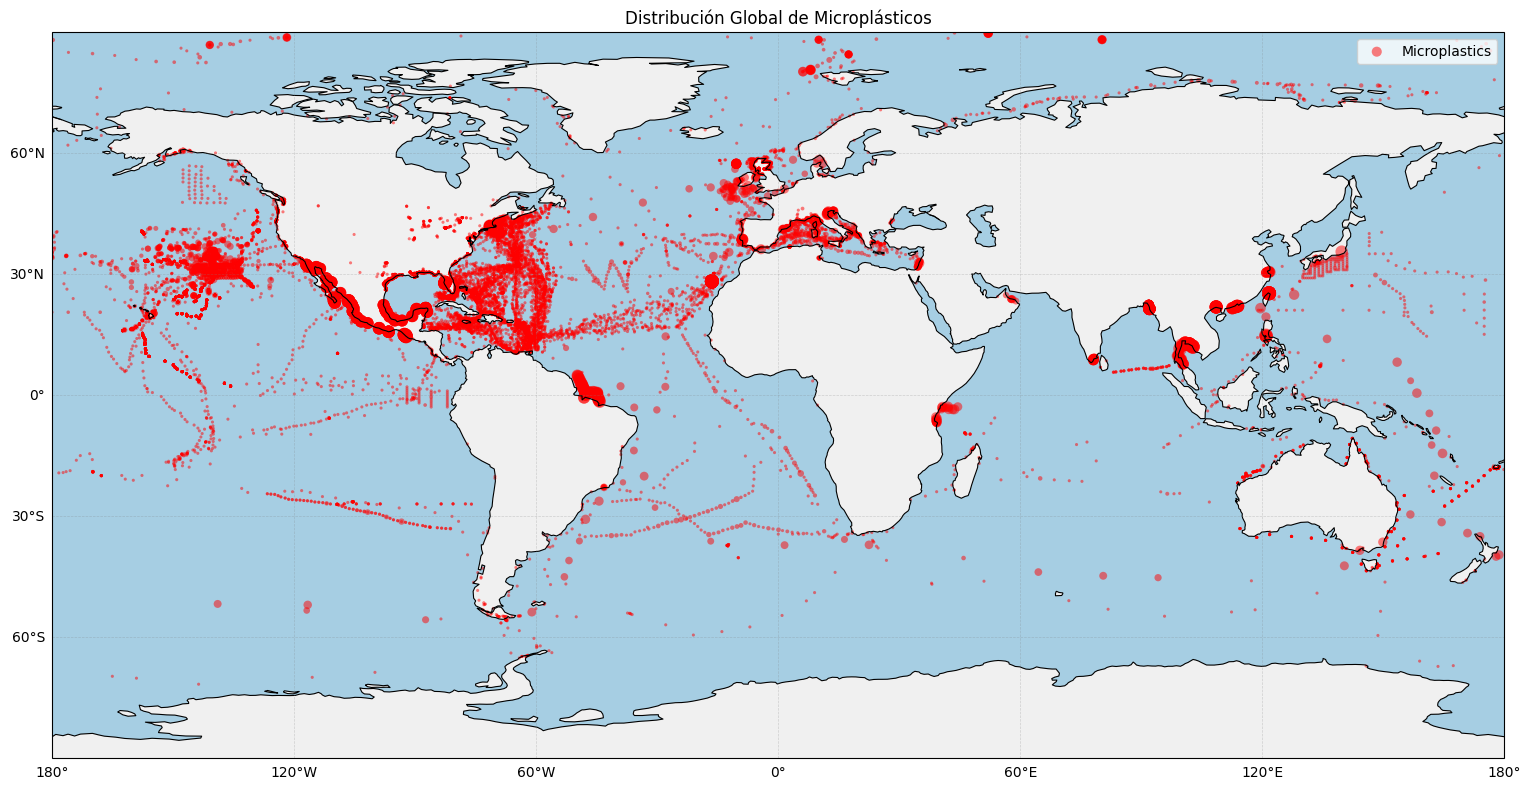

In [23]:
df_microplastics = df_microplastics.rename(columns={
    "Latitude (degree)": "latitude",
    "Longitude(degree)": "longitude",
    "Microplastics measurement": "measurement"
})

df_microplastics = df_microplastics.dropna(subset=["latitude", "longitude"])
df_microplastics["latitude"] = df_microplastics["latitude"].astype(float)
df_microplastics["longitude"] = df_microplastics["longitude"].astype(float)
df_microplastics = df_microplastics[(df_microplastics["latitude"] >= -90) & (df_microplastics["latitude"] <= 90)]
df_microplastics["longitude"] = df_microplastics["longitude"].apply(lambda x: x if x <= 180 else x - 360)
df_microplastics = df_microplastics[(df_microplastics["longitude"] >= -180) & (df_microplastics["longitude"] <= 180)]

if "measurement" not in df_microplastics.columns:
    df_microplastics["measurement"] = 1

sizes_micro = np.log1p(df_microplastics["measurement"].fillna(0)) * 10
sizes_micro = np.clip(sizes_micro, 5, 100) 

plt.figure(figsize=(16, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines(linewidth=0.8)
ax.add_feature(cfeature.LAND, facecolor="#f0f0f0")
ax.add_feature(cfeature.OCEAN, facecolor="#a6cee3")
gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.3, linestyle='--')
gl.top_labels = False
gl.right_labels = False

sc = ax.scatter(
    df_microplastics["longitude"], df_microplastics["latitude"],
    s=sizes_micro,
    c="red",
    alpha=0.5,
    edgecolor="none",
    transform=ccrs.PlateCarree(),
    label="Microplastics"
)

plt.legend(loc="upper right")
plt.title("Distribución Global de Microplásticos")
plt.tight_layout()
plt.show()

## Filtro a Norte América
Se filtró el dataset solo con datos de Norte América

In [24]:
df_north_america = df_microplastics[
    (df_microplastics['longitude'].between(-180, -50)) &
    (df_microplastics['latitude'].between(5, 83))
].copy()

print("Filas antes:", len(df_microplastics))
print("Filas después del filtro:", len(df_north_america))


Filas antes: 22530
Filas después del filtro: 16808


In [25]:
df_north_america.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16808 entries, 0 to 22368
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   OBJECTID                     16808 non-null  int64  
 1   latitude                     16808 non-null  float64
 2   longitude                    16808 non-null  float64
 3   Ocean                        16537 non-null  object 
 4   Region                       7151 non-null   object 
 5   Subregion                    243 non-null    object 
 6   Country                      6297 non-null   object 
 7   State                        6049 non-null   object 
 8   Beach Location               5944 non-null   object 
 9   Marine Setting               16808 non-null  object 
 10  Ocean Bottom Depth (m)       9 non-null      float64
 11  Water Sample Depth (m)       10502 non-null  float64
 12  Sediment Sample Depth (m)    108 non-null    float64
 13  Sampling Method      

In [26]:
select_cols = ['latitude', 'longitude', 'Ocean', 'Water Sample Depth (m)', 'Marine Setting', 'Sampling Method', 'Volunteers Number', 'Standardized Nurdle  Amount', 'Concentration class range', 'Concentration class text', 'Unit', 'Mesh size (mm)', 'measurement', 'Collecting Time (min)', 'Date (MM-DD-YYYY)']

df_north_america = df_north_america[select_cols].copy()

In [27]:
object_cols = df_north_america.select_dtypes(include="object").columns

for col in object_cols:
    print(f"\n{col} ({df_north_america[col].nunique()} valores únicos):")
    print(df_north_america[col].unique())


Ocean (3 valores únicos):
['Atlantic Ocean' 'Pacific Ocean' 'Arctic Ocean' nan]

Marine Setting (4 valores únicos):
['Ocean water' 'Beach' 'Beach-Nurdle Patrol' 'Ocean sediment']

Sampling Method (12 valores únicos):
['Neuston net' 'Grab sample' 'Intake seawater pump' 'Manta net'
 'PVC cylinder' 'Hand picking' 'Van Veen grab' 'Metal spoon'
 'Van Dorn sampler' 'Plankton net' 'Shipek grab sampler'
 'stainless-steel spatula']

Concentration class range (17 valores únicos):
['0-0.0005' '0.0005-0.005' '0.005-1' '1-10' '>=10' '500-30000' '0-100'
 '2-40' '40-200' '1-2' '0' '>200' '0-2' '150-200' '20-150' '>40000'
 '30000-40000']

Concentration class text (5 valores únicos):
['Very Low' 'Low' 'Medium' 'High' 'Very High']

Unit (3 valores únicos):
['pieces/m3' 'pieces/10 mins' 'pieces kg-1 d.w.']

Date (MM-DD-YYYY) (5248 valores únicos):
['7/13/1989 12:00:00 AM' '10/12/1989 12:00:00 AM' '10/15/1989 12:00:00 AM'
 ... '2/6/2023 12:00:00 AM' '2/12/2023 12:00:00 AM' '2/5/2023 12:00:00 AM']


In [28]:
dups_completos = df_north_america[df_north_america.duplicated(keep=False)].sort_values(by=select_cols)

print(f"Duplicados completos encontrados: {len(dups_completos)}")
dups_completos.head(10)

cols_relevantes = [
    'latitude', 
    'longitude', 
    'Ocean', 
    'Water Sample Depth (m)', 
    'Marine Setting', 
    'Sampling Method', 
    'Date (MM-DD-YYYY)'
]

dups_relevantes = df_north_america[df_north_america.duplicated(subset=cols_relevantes, keep=False)]
dups_relevantes = dups_relevantes.sort_values(by=cols_relevantes)

print(f"Duplicados por condiciones relevantes: {len(dups_relevantes)}")
print(f"Grupos únicos duplicados: {dups_relevantes[cols_relevantes].drop_duplicates().shape[0]}")

Duplicados completos encontrados: 1074
Duplicados por condiciones relevantes: 3169
Grupos únicos duplicados: 1312


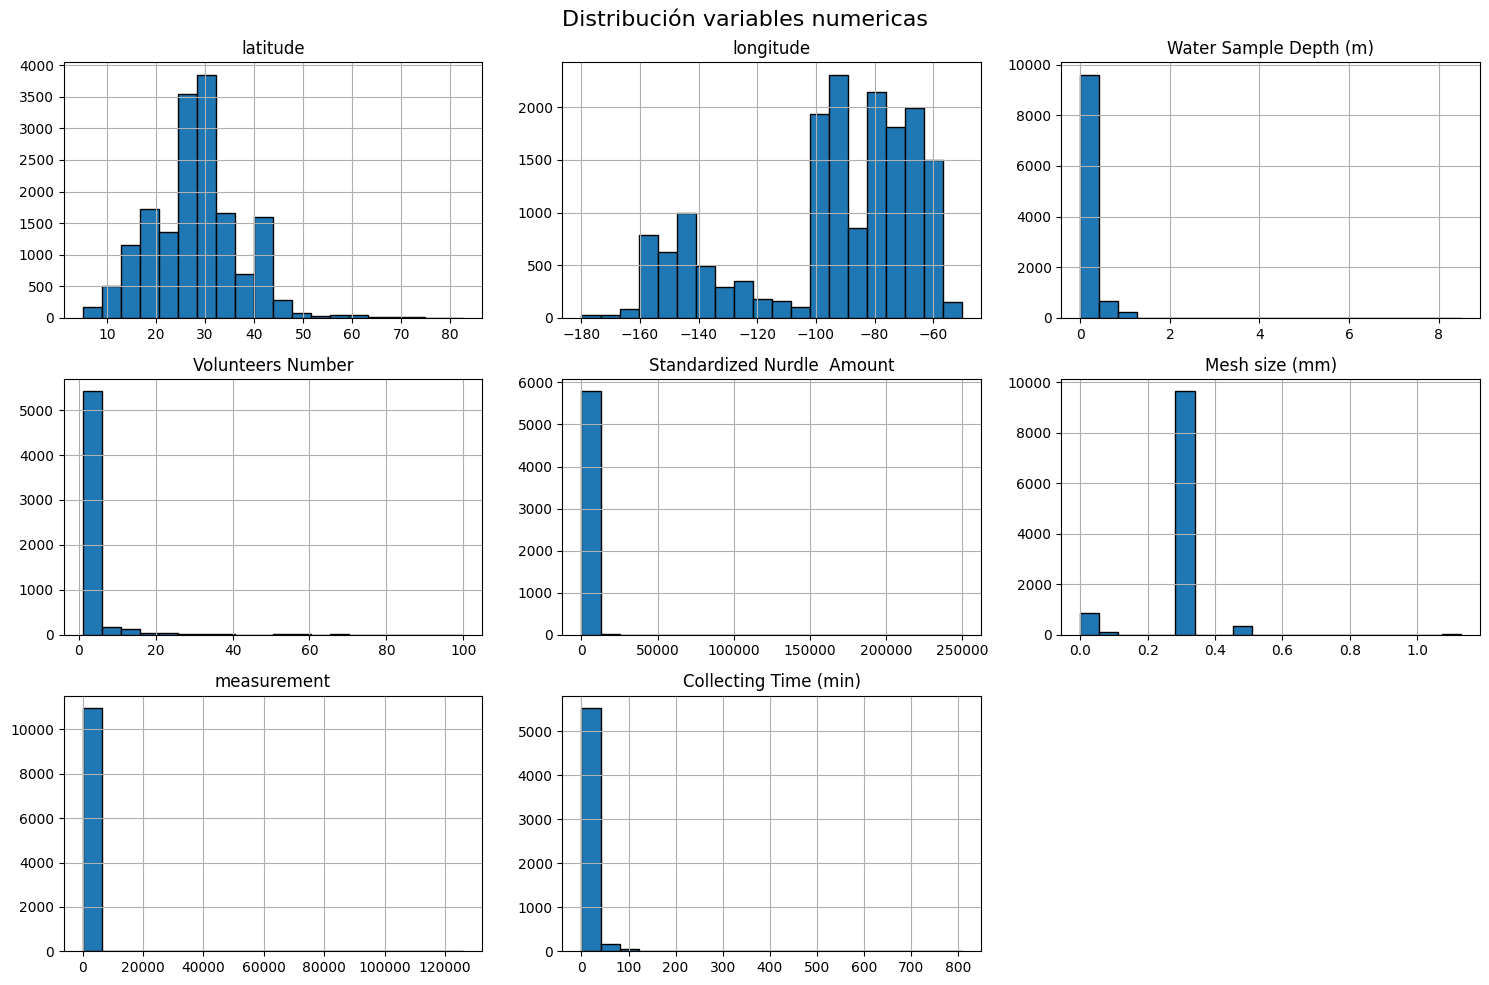

In [29]:
num_cols = df_north_america.select_dtypes(include='number').columns

df_north_america[num_cols].hist(figsize=(15, 10), bins=20, edgecolor='black')
plt.suptitle("Distribución variables numericas", fontsize=16)
plt.tight_layout()
plt.show()

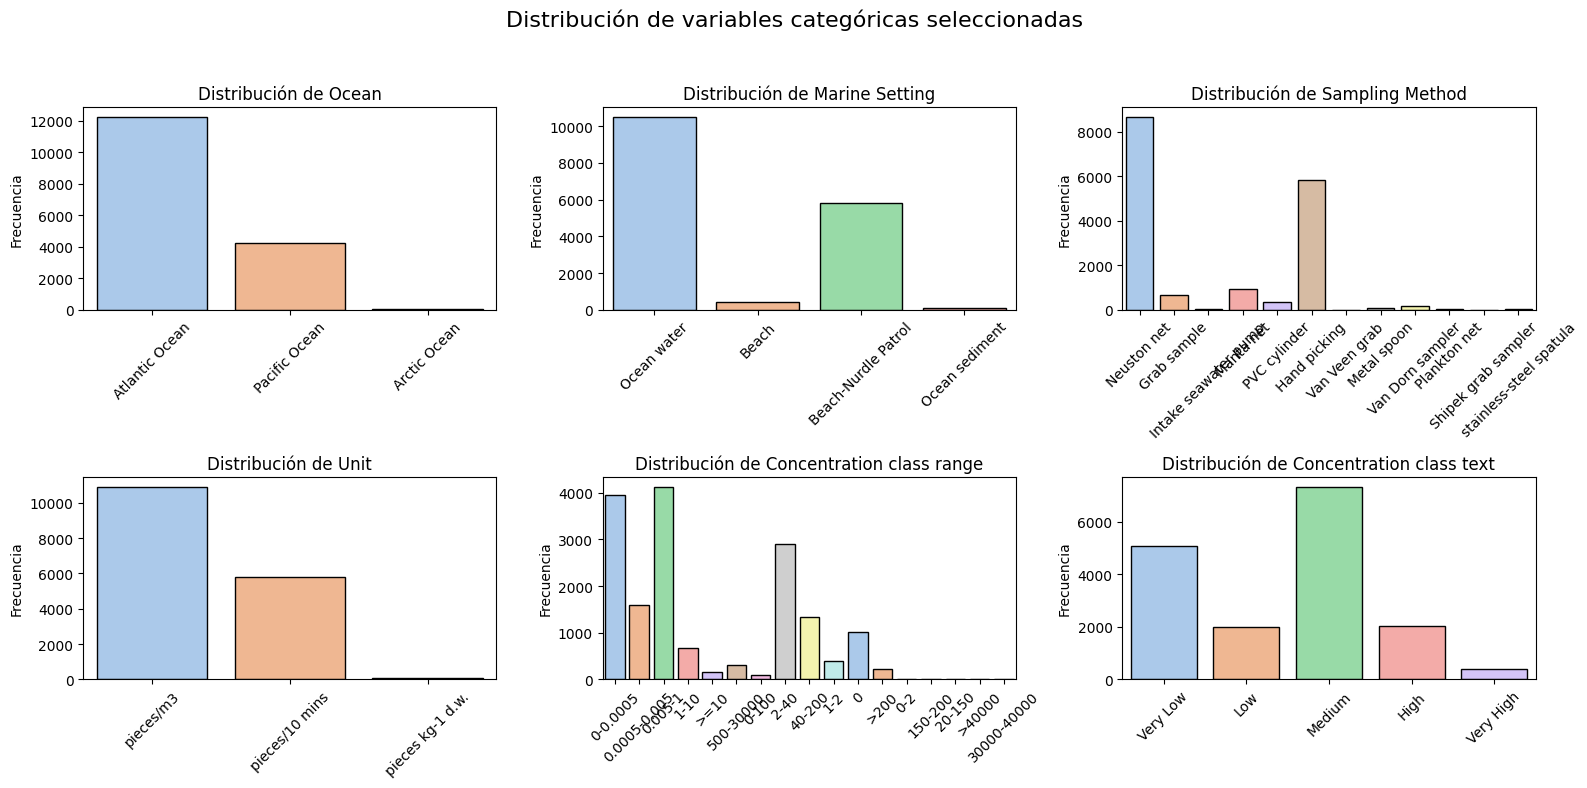

In [30]:
cat_cols = [
    "Ocean",
    "Marine Setting",
    "Sampling Method",
    "Unit",
    "Concentration class range",
    "Concentration class text"
]

n_cols = 3
n_rows = math.ceil(len(cat_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(
        data=df_north_america,
        x=col,
        hue=col,
        legend=False,
        palette='pastel',
        edgecolor='black',
        ax=axes[i]
    )
    axes[i].set_title(f"Distribución de {col}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Frecuencia")
    axes[i].tick_params(axis='x', rotation=45)

# Ocultar ejes vacíos
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.suptitle("Distribución de variables categóricas seleccionadas", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

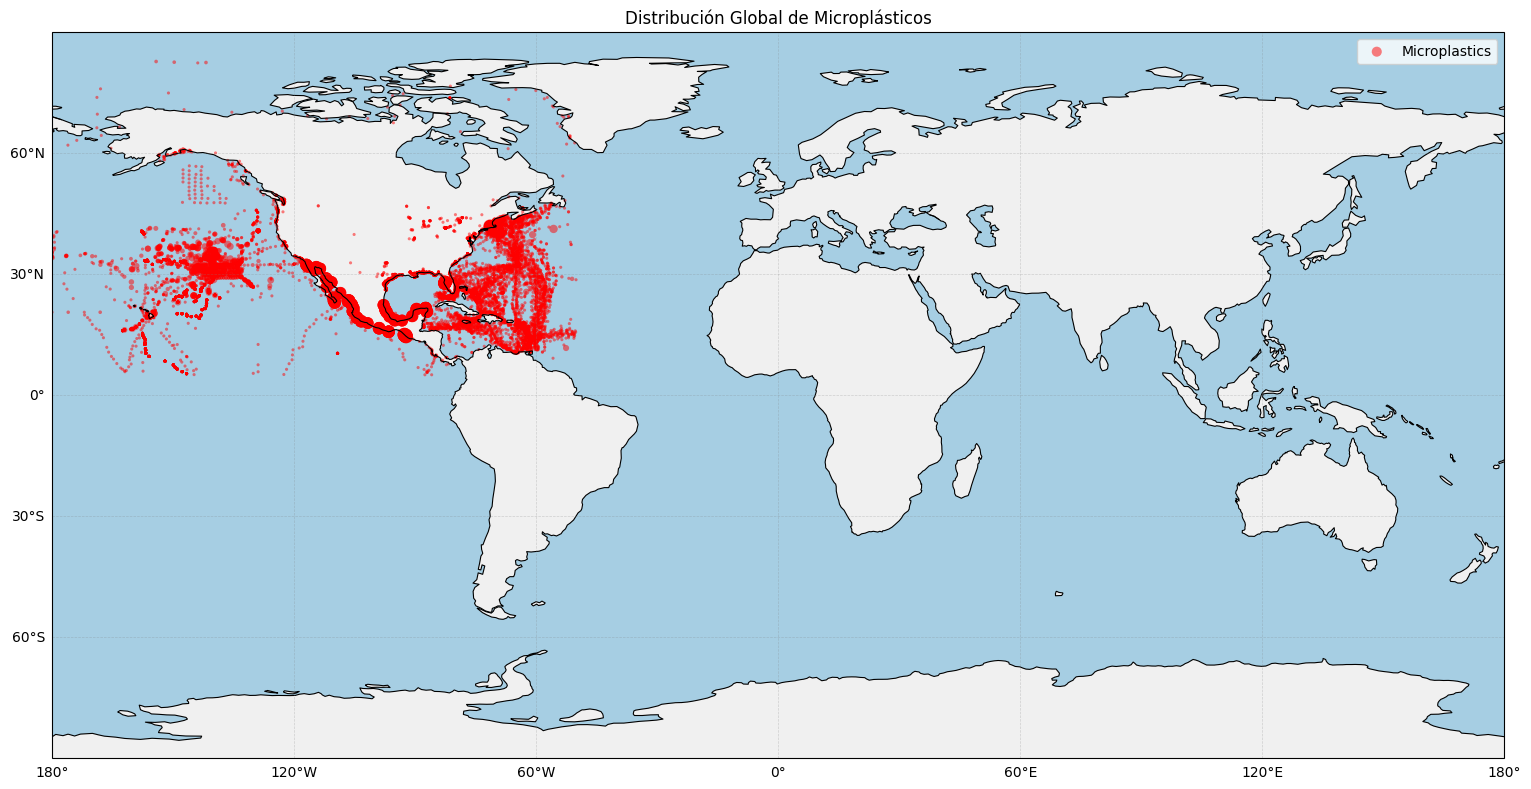

In [31]:
df_north_america = df_north_america.rename(columns={
    "Latitude (degree)": "latitude",
    "Longitude(degree)": "longitude",
    "Microplastics measurement": "measurement"
})

df_north_america = df_north_america.dropna(subset=["latitude", "longitude"])
df_north_america["latitude"] = df_north_america["latitude"].astype(float)
df_north_america["longitude"] = df_north_america["longitude"].astype(float)
df_north_america = df_north_america[(df_north_america["latitude"] >= -90) & (df_north_america["latitude"] <= 90)]
df_north_america["longitude"] = df_north_america["longitude"].apply(lambda x: x if x <= 180 else x - 360)
df_north_america = df_north_america[(df_north_america["longitude"] >= -180) & (df_north_america["longitude"] <= 180)]

if "measurement" not in df_north_america.columns:
    df_north_america["measurement"] = 1

sizes_micro = np.log1p(df_north_america["measurement"].fillna(0)) * 10
sizes_micro = np.clip(sizes_micro, 5, 100) 

plt.figure(figsize=(16, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines(linewidth=0.8)
ax.add_feature(cfeature.LAND, facecolor="#f0f0f0")
ax.add_feature(cfeature.OCEAN, facecolor="#a6cee3")
gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.3, linestyle='--')
gl.top_labels = False
gl.right_labels = False

sc = ax.scatter(
    df_north_america["longitude"], df_north_america["latitude"],
    s=sizes_micro,
    c="red",
    alpha=0.5,
    edgecolor="none",
    transform=ccrs.PlateCarree(),
    label="Microplastics"
)

plt.legend(loc="upper right")
plt.title("Distribución Global de Microplásticos")
plt.tight_layout()
plt.show()

Observaciones
- Hay muchas columnas con valores nulos que son relevantes para el análisis
- Las fechas no estan en formato datetime
- Hay que limpiar  los rangos de concentracion.
- Hay oceanos nulos
- Hay filas duplicadas por completo y filas con datos relevantes duplicados (las variables relevantes se pueden sumar de forma en que quede un solo registro con toda la informacion o dejarlo así)

# Marine Species

In [32]:
df_marine_species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1665559 entries, 0 to 1665558
Data columns (total 50 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   gbifID                            1665559 non-null  int64  
 1   datasetKey                        1665559 non-null  object 
 2   occurrenceID                      1654317 non-null  object 
 3   kingdom                           1665559 non-null  object 
 4   phylum                            1626989 non-null  object 
 5   class                             1184989 non-null  object 
 6   order                             1522846 non-null  object 
 7   family                            1505535 non-null  object 
 8   genus                             1441684 non-null  object 
 9   species                           1283504 non-null  object 
 10  infraspecificEpithet              1372 non-null     object 
 11  taxonRank                         166

In [33]:
df_marine_species.describe().T

,count,mean,std,min,25%,50%,75%,max
gbifID,1665559.0,3.908309e+09,1.522466e+09,1.858873e+07,2.268711e+09,4.993192e+09,5.257758e+09,5.839622e+09
individualCount,316950.0,2.454331e+02,6.930569e+03,0.000000e+00,1.000000e+00,3.000000e+00,2.100000e+01,2.351326e+06
decimalLatitude,1665559.0,3.694011e+01,9.283354e+00,5.468060e+00,3.394647e+01,3.652542e+01,4.338330e+01,8.218330e+01
decimalLongitude,1665559.0,-1.048692e+02,2.429034e+01,-1.791972e+02,-1.219458e+02,-1.198232e+02,-8.263460e+01,1.798160e+02
coordinateUncertaintyInMeters,890125.0,4.897871e+02,6.079656e+03,1.000000e+00,2.500000e+02,2.500000e+02,2.500000e+02,3.331681e+06
coordinatePrecision,9900.0,5.606705e-02,2.176688e-01,0.000000e+00,1.000000e-05,1.000000e-05,1.667000e-02,1.000000e+00
elevation,103890.0,1.631109e+01,1.038065e+02,-6.600000e+01,0.000000e+00,0.000000e+00,0.000000e+00,3.753500e+03
elevationAccuracy,103810.0,5.822031e-01,6.358096e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.188000e+03
depth,1665559.0,3.854935e+01,5.534083e+01,1.600000e+01,1.860000e+01,2.000000e+01,3.700000e+01,1.080000e+03
depthAccuracy,1630818.0,6.660560e+00,2.107107e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.000000e+02


In [34]:
df_marine_species.describe(include=['object']).T

,count,unique,top,freq
datasetKey,1665559,382,154d6192-bea0-4bcb-ab58-1c573081591d,712306
occurrenceID,1654317,1654076,09PROBE-01527,2
kingdom,1665559,8,Animalia,1317604
phylum,1626989,112,Chordata,431804
class,1184989,276,Phaeophyceae,163709
order,1522846,795,Perciformes,153080
family,1505535,2886,Strongylocentrotidae,128397
genus,1441684,8053,Macrocystis,95756
species,1283504,13316,Macrocystis pyrifera,95756
infraspecificEpithet,1372,245,pacifica,90


In [35]:
select_cols_species = ['scientificName', 'kingdom', 'phylum', 'class', 'order', 'family', 'genus', 'taxonRank', 'decimalLatitude', 'decimalLongitude', 'eventDate', 'year', 'month', 'day', 'depth', 'individualCount']

df_marine_species = df_marine_species[select_cols_species].copy()

In [36]:
df_marine_species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1665559 entries, 0 to 1665558
Data columns (total 16 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   scientificName    1665559 non-null  object 
 1   kingdom           1665559 non-null  object 
 2   phylum            1626989 non-null  object 
 3   class             1184989 non-null  object 
 4   order             1522846 non-null  object 
 5   family            1505535 non-null  object 
 6   genus             1441684 non-null  object 
 7   taxonRank         1665559 non-null  object 
 8   decimalLatitude   1665559 non-null  float64
 9   decimalLongitude  1665559 non-null  float64
 10  eventDate         1665559 non-null  object 
 11  year              1665559 non-null  int64  
 12  month             1490224 non-null  float64
 13  day               1419512 non-null  float64
 14  depth             1665559 non-null  float64
 15  individualCount   316950 non-null   float64
dtype

In [37]:
df_marine_species.describe().T

,count,mean,std,min,25%,50%,75%,max
decimalLatitude,1665559.0,36.940110,9.283354,5.46806,33.946467,36.525415,43.3833,8.218330e+01
decimalLongitude,1665559.0,-104.869157,24.290337,-179.19720,-121.945786,-119.823183,-82.6346,1.798160e+02
year,1665559.0,2013.355269,12.571818,1972.00000,2010.000000,2018.000000,2023.0000,2.023000e+03
month,1490224.0,8.703417,2.971359,1.00000,7.000000,10.000000,11.0000,1.200000e+01
day,1419512.0,21.317815,10.502369,1.00000,12.000000,29.000000,30.0000,3.100000e+01
depth,1665559.0,38.549348,55.340830,16.00000,18.600000,20.000000,37.0000,1.080000e+03
individualCount,316950.0,245.433100,6930.569173,0.00000,1.000000,3.000000,21.0000,2.351326e+06


In [38]:
object_cols = df_marine_species.select_dtypes(include="object").columns

for col in object_cols:
    print(f"\n{col} ({df_marine_species[col].nunique()} valores únicos):")
    print(df_marine_species[col].unique())


scientificName (22165 valores únicos):
['Ctenoides mitis (Lamarck, 1807)' 'Americardia media (Linnaeus, 1758)'
 'Monoplex pilearis (Linnaeus, 1758)' ... 'Halichrysis corallinarius'
 'Lobophora canariensis (Sauv.) C.W.Vieira, De Clerck & Payri, 2016'
 'Dasya sylviae C.W.Schneid., M.M.Cassidy & G.W.Saunders, 2021']

kingdom (8 valores únicos):
['Animalia' 'Chromista' 'incertae sedis' 'Plantae' 'Bacteria' 'Archaea'
 'Protozoa' 'Fungi']

phylum (112 valores únicos):
['Mollusca' 'Bryozoa' 'Cnidaria' 'Chordata' 'Annelida' 'Echinodermata'
 'Arthropoda' 'Porifera' 'Nemertea' 'Hemichordata' 'Myzozoa' nan
 'Chaetognatha' 'Sipuncula' 'Rotifera' 'Brachiopoda' 'Phoronida'
 'Nematoda' 'Rhodophyta' 'Priapulida' 'Foraminifera' 'Ctenophora'
 'Platyhelminthes' 'Ochrophyta' 'Tracheophyta' 'Gastrotricha'
 'Chlorophyta' 'Xenacoelomorpha' 'Cyanobacteria' 'Chloroflexota'
 'Nitrospinota' 'Nanoarchaeota' 'Acidobacteriota' 'Fusobacteriota'
 'Actinobacteriota' 'Proteobacteria' 'Haptophyta' 'Cercozoa'
 'Verrucom

In [39]:
bio_cols = [
    'scientificName',
    'kingdom',
    'phylum',
    'class',
    'order',
    'family',
    'genus',
    'taxonRank'
]

dups_completos = df_marine_species[df_marine_species.duplicated(keep=False)]

print(f"Filas duplicadas completas: {len(dups_completos)}")

dups_bio = df_marine_species[df_marine_species.duplicated(subset=bio_cols, keep=False)].sort_values(by=bio_cols)

print(f"Filas duplicadas por taxonomía: {len(dups_bio)}")
print(f"Grupos únicos duplicados: {dups_bio[bio_cols].drop_duplicates().shape[0]}")


Filas duplicadas completas: 1139109
Filas duplicadas por taxonomía: 1658175
Grupos únicos duplicados: 14789


## Gráficos

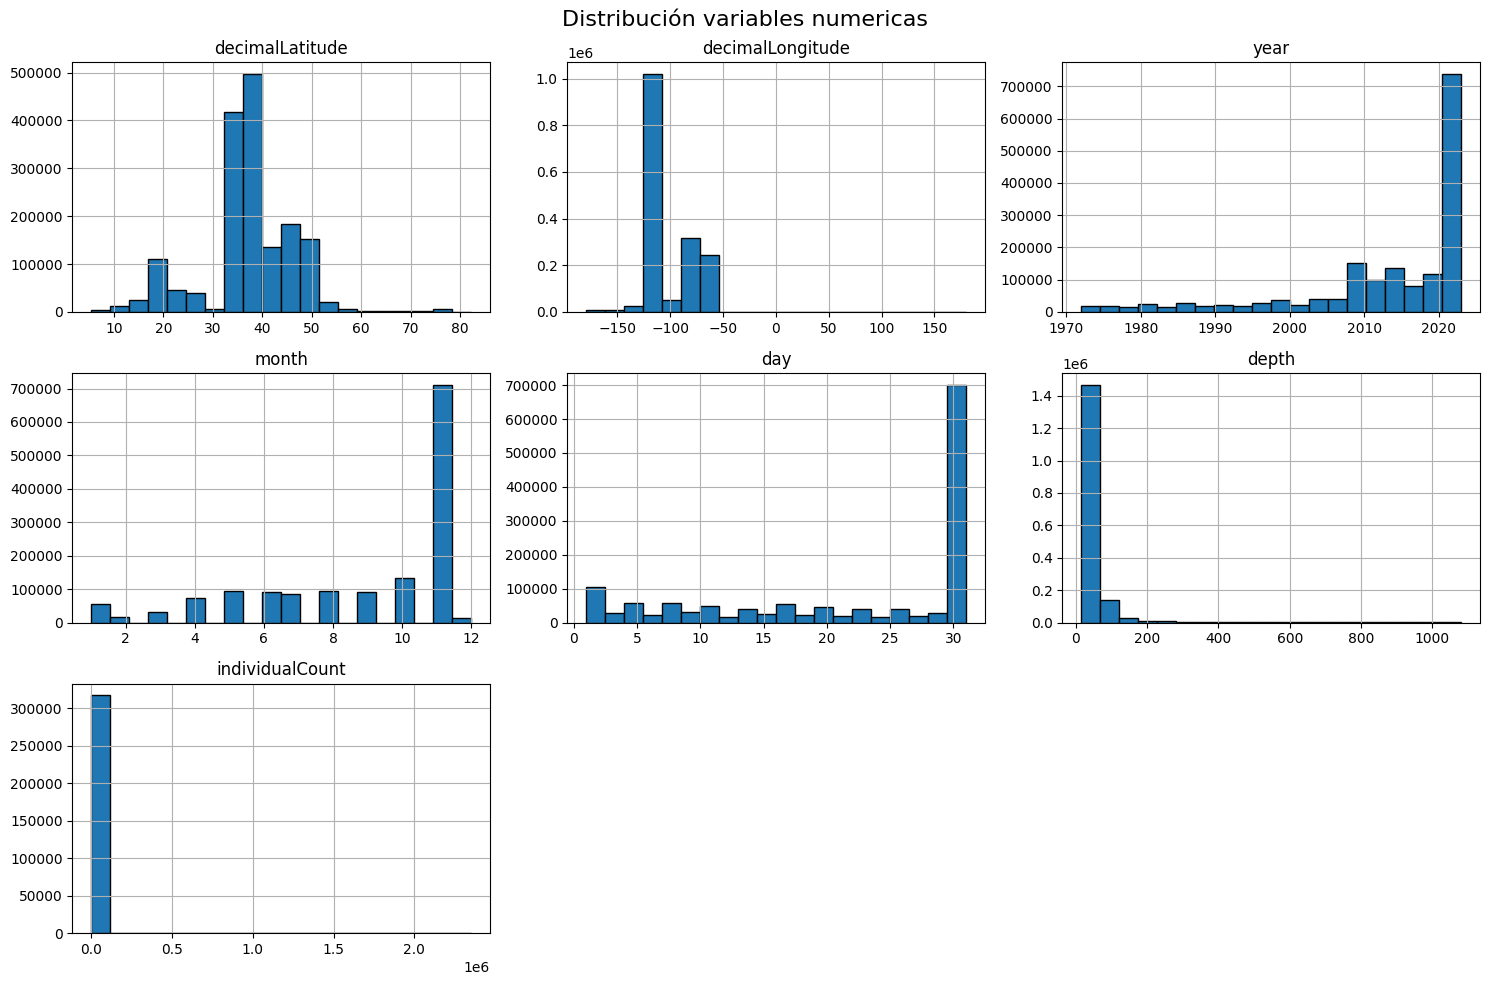

In [40]:
num_cols = df_marine_species.select_dtypes(include='number').columns

df_marine_species[num_cols].hist(figsize=(15, 10), bins=20, edgecolor='black')
plt.suptitle("Distribución variables numericas", fontsize=16)
plt.tight_layout()
plt.show()

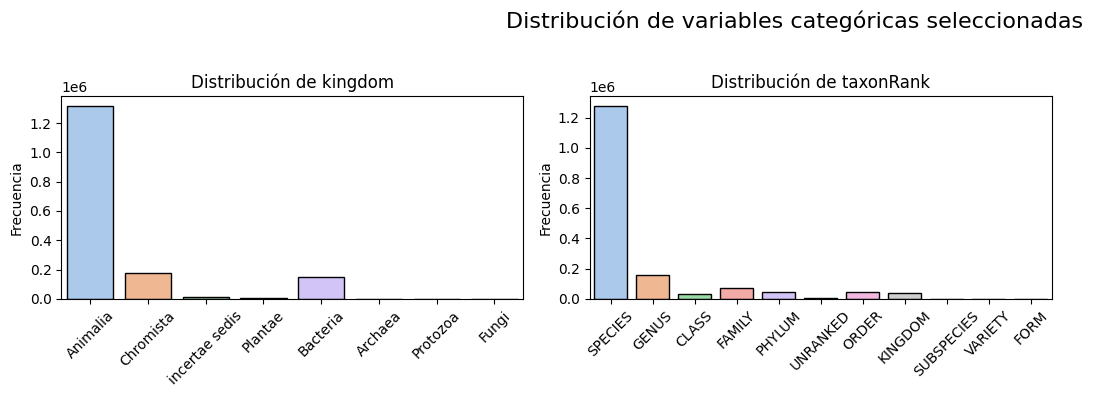

In [41]:
cat_cols = [
    "kingdom",
    "taxonRank"
]

n_cols = 3
n_rows = math.ceil(len(cat_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(
        data=df_marine_species,
        x=col,
        hue=col,
        legend=False,
        palette='pastel',
        edgecolor='black',
        ax=axes[i]
    )
    axes[i].set_title(f"Distribución de {col}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Frecuencia")
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.suptitle("Distribución de variables categóricas seleccionadas", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Observaciones
- Hay conteos de especies en ciertas latitudes con valor 0, que son irrelevantes. 
- Hay valores nulos en algunas variables, pero son pocos.
- Hay muchas filas duplicadas por completo, ademas, se pueden clasificar las especies como dimensiones, de forma en que quede más normalizado.

# Climate History

In [42]:
df_climate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   date                          527 non-null    object 
 1   location_id                   527 non-null    object 
 2   location_name                 527 non-null    object 
 3   latitude                      527 non-null    float64
 4   longitude                     527 non-null    float64
 5   ocean                         527 non-null    object 
 6   marine_setting                527 non-null    object 
 7   wave_direction_dominant       496 non-null    float64
 8   wave_period_max               496 non-null    float64
 9   wave_height_max               496 non-null    float64
 10  wind_wave_direction_dominant  496 non-null    float64
 11  swell_wave_height_max         496 non-null    float64
 12  extraction_timestamp          527 non-null    object 
dtypes: fl

In [43]:
df_marine_species.describe().T

,count,mean,std,min,25%,50%,75%,max
decimalLatitude,1665559.0,36.940110,9.283354,5.46806,33.946467,36.525415,43.3833,8.218330e+01
decimalLongitude,1665559.0,-104.869157,24.290337,-179.19720,-121.945786,-119.823183,-82.6346,1.798160e+02
year,1665559.0,2013.355269,12.571818,1972.00000,2010.000000,2018.000000,2023.0000,2.023000e+03
month,1490224.0,8.703417,2.971359,1.00000,7.000000,10.000000,11.0000,1.200000e+01
day,1419512.0,21.317815,10.502369,1.00000,12.000000,29.000000,30.0000,3.100000e+01
depth,1665559.0,38.549348,55.340830,16.00000,18.600000,20.000000,37.0000,1.080000e+03
individualCount,316950.0,245.433100,6930.569173,0.00000,1.000000,3.000000,21.0000,2.351326e+06


In [44]:
df_climate.describe(include=['object']).T

,count,unique,top,freq
date,527,31,2023-12-30,17
location_id,527,17,cape_cod_ma,31
location_name,527,17,"Cape Cod, Massachusetts",31
ocean,527,2,Atlantic Ocean,372
marine_setting,527,1,Beach,527
extraction_timestamp,527,527,2025-10-19T17:55:18.213870,1


In [45]:
object_cols = df_climate.select_dtypes(include="object").columns

for col in object_cols:
    print(f"\n{col} ({df_climate[col].nunique()} valores únicos):")
    print(df_climate[col].unique())


date (31 valores únicos):
['2023-12-30' '2023-12-29' '2023-12-28' '2023-12-27' '2023-12-26'
 '2023-12-25' '2023-12-24' '2023-12-23' '2023-12-22' '2023-12-21'
 '2023-12-20' '2023-12-19' '2023-12-18' '2023-12-17' '2023-12-16'
 '2023-12-15' '2023-12-14' '2023-12-13' '2023-12-12' '2023-12-11'
 '2023-12-10' '2023-12-09' '2023-12-08' '2023-12-07' '2023-12-06'
 '2023-12-05' '2023-12-04' '2023-12-03' '2023-12-02' '2023-12-01'
 '2023-11-30']

location_id (17 valores únicos):
['cape_cod_ma' 'charleston_sc' 'chesapeake_bay_md' 'corpus_christi_tx'
 'galveston_tx' 'halifax_ns' 'key_west_fl' 'los_angeles_ca' 'miami_fl'
 'mobile_bay_al' 'outer_banks_nc' 'portland_me' 'san_diego_ca'
 'san_francisco_ca' 'seattle_wa' 'tampa_bay_fl' 'vancouver_bc']

location_name (17 valores únicos):
['Cape Cod, Massachusetts' 'Charleston, South Carolina'
 'Chesapeake Bay, Maryland' 'Corpus Christi, Texas' 'Galveston, Texas'
 'Halifax, Nova Scotia' 'Key West, Florida' 'Los Angeles, California'
 'Miami, Florida' 'Mobile 

## Gráficos

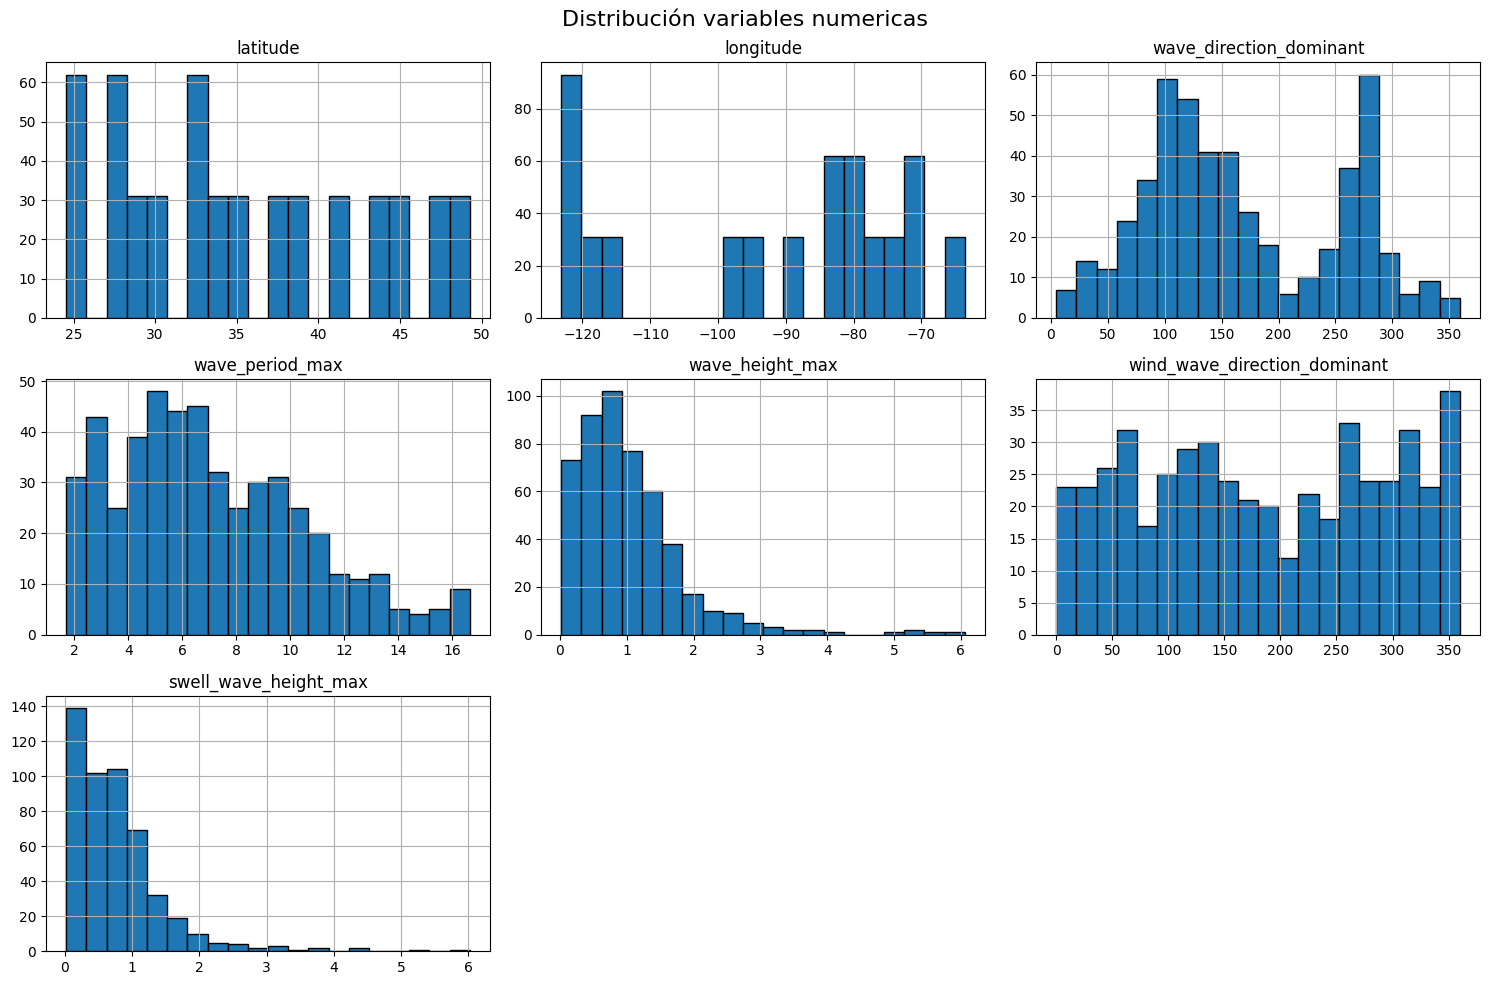

In [46]:
num_cols = df_climate.select_dtypes(include='number').columns

df_climate[num_cols].hist(figsize=(15, 10), bins=20, edgecolor='black')
plt.suptitle("Distribución variables numericas", fontsize=16)
plt.tight_layout()
plt.show()

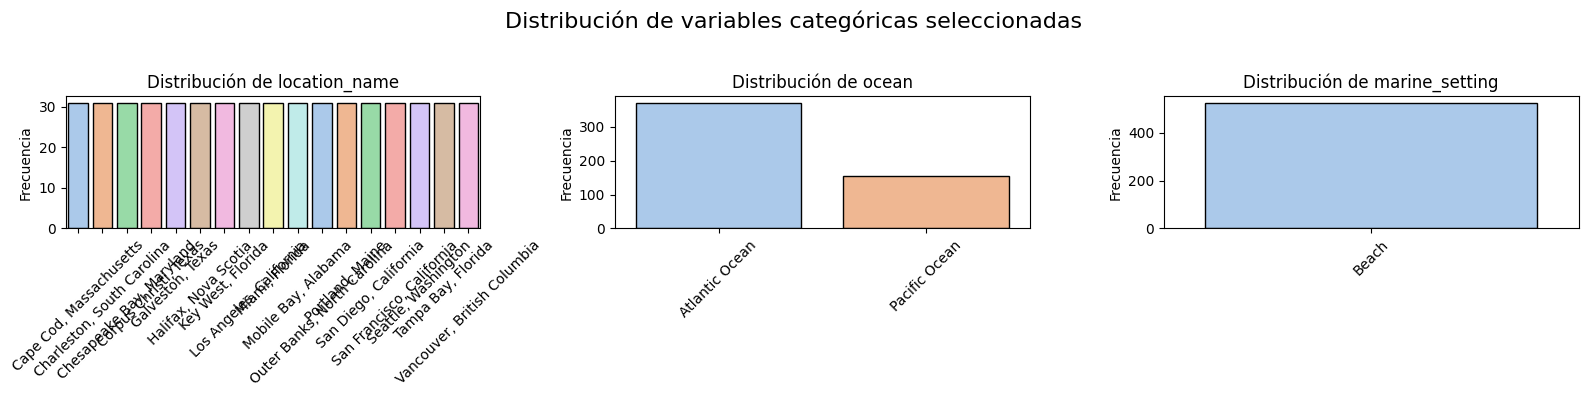

In [47]:
cat_cols = [
    "location_name",
    "ocean",
    'marine_setting'
]

n_cols = 3
n_rows = math.ceil(len(cat_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(
        data=df_climate,
        x=col,
        hue=col,
        legend=False,
        palette='pastel',
        edgecolor='black',
        ax=axes[i]
    )
    axes[i].set_title(f"Distribución de {col}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Frecuencia")
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.suptitle("Distribución de variables categóricas seleccionadas", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Observaciones
- Hay valores nulos de: wave_period_max, wave_height_max, wind_wave_direction_dominant y  swell_wave_height_max.
- Deben ponerse los formatos de fecha en el formato correcto.

In [2]:
import pandas as pd

In [3]:
merge = pd.read_csv('data/merged_marine_data.csv')

C:\Users\yenpa\AppData\Local\Temp\ipykernel_43488\124884994.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  merge = pd.read_csv('data/merged_marine_data.csv')


In [4]:
merge.isna().sum()

objectid                          0
latitude                          0
longitude                         0
ocean                             0
region                         9657
subregion                     16565
country                       10511
state                         10759
beach_location                10864
marine_setting                    0
ocean_bottom_depth            16799
water_sample_depth             6306
sediment_sample_depth         16700
sampling_method                   0
mesh_size                      5819
transect_no                   16700
sampling_point_on_beach       16438
volunteers_number             11007
collecting_time               11007
standardized_nurdle_amount    11007
microplastics_measurement      5801
unit                              0
concentration_class_range         0
concentration_class_text          0
short_reference                   0
long_reference                    0
doi                               0
organization                